In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import numpy as np
import bqplot

In [2]:
# 1 data and axes
shape_data = bqplot.topo_load('map_data/WorldMap.json')

In [3]:
# 2 scales
sc_geo = bqplot.Mercator()

In [5]:
# 3 marks
shape_map = bqplot.Map(map_data = shape_data, scales={'projection':sc_geo})

In [8]:
# 4 figure
fig = bqplot.Figure(marks=[shape_map],fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [11]:
# 1 data and axes
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# 2 scales
sc_geo = bqplot.Gnomonic()

# 3 marks
shape_map = bqplot.Map(map_data = shape_data, scales={'projection':sc_geo})

# 4 figure
fig = bqplot.Figure(marks=[shape_map],fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [13]:
# 1 data and axes
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2 scales
sc_geo = bqplot.AlbersUSA()

# 3 marks
states_map = bqplot.Map(map_data = state_data, scales={'projection':sc_geo})

# 4 figure
fig = bqplot.Figure(marks=[states_map],fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [14]:
# 1 data and axes
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2 scales
sc_geo = bqplot.AlbersUSA()

# tool tip
tt = bqplot.Tooltip(fields=['id','name'])
states_map.interactions = {'click':'select', 'hover':'tooltip'}

# 3 marks
states_map = bqplot.Map(map_data = state_data, scales={'projection':sc_geo}, tooltip = tt)

# 4 figure
fig = bqplot.Figure(marks=[states_map],fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

## Geopandas

In [15]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [16]:
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))

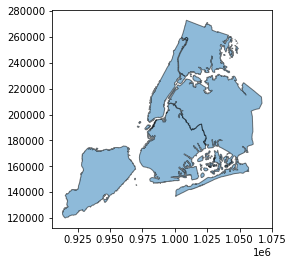

In [18]:
gdf.plot(alpha=0.5, edgecolor='k')

In [19]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

In [20]:
gdf_councils.head()

,OBJECTID_1,District,Council_me,ShapeSTArea,ShapeSTLength,geometry
0,811,5,Vanna Pianfetti,1.838498e+08,211060.175261,"POLYGON ((-88.31441 40.11699, -88.31454 40.116..."
1,812,3,Daniel Iniguez,2.009197e+08,144362.359386,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
2,813,1,Davion Williams,1.078965e+08,83420.727939,"POLYGON ((-88.22283 40.16000, -88.22283 40.160..."
3,814,4,Michael Foellmer,1.049800e+08,77363.320814,"POLYGON ((-88.26890 40.12733, -88.27076 40.127..."
4,815,2,Alicia Beck,5.164512e+07,62243.277115,"POLYGON ((-88.23537 40.10798, -88.23537 40.107..."


In [21]:
gdf_councils.describe()

,OBJECTID_1,ShapeSTArea,ShapeSTLength
count,5.000000,5.000000e+00,5.000000
mean,813.000000,1.298582e+08,115689.972103
std,1.581139,6.161040e+07,61814.979912
min,811.000000,5.164512e+07,62243.277115
25%,812.000000,1.049800e+08,77363.320814
50%,813.000000,1.078965e+08,83420.727939
75%,814.000000,1.838498e+08,144362.359386
max,815.000000,2.009197e+08,211060.175261


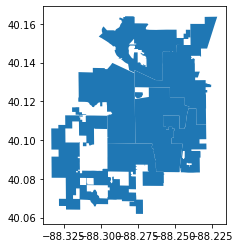

In [22]:
gdf_councils.plot()

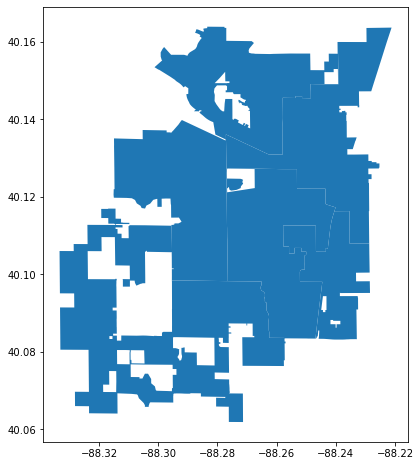

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
gdf_councils.plot(ax=ax)
plt.show()

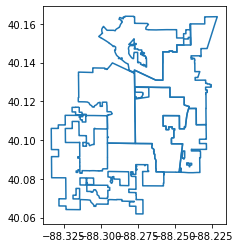

In [25]:
gdf_councils.boundary.plot()

In [28]:
gdf_councils.bounds

,minx,miny,maxx,maxy
0,-88.333303,40.061894,-88.257012,40.116995
1,-88.315071,40.098268,-88.239120,40.163956
2,-88.277158,40.107938,-88.221225,40.163721
3,-88.276971,40.083257,-88.240119,40.127432
4,-88.257818,40.083182,-88.228505,40.116346


In [29]:
gdf_councils.centroid

C:\Users\boste\anaconda3\envs\DataViz\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0    POINT (-88.29985 40.08720)
1    POINT (-88.28230 40.13391)
2    POINT (-88.24309 40.13570)
3    POINT (-88.25983 40.10719)
4    POINT (-88.24095 40.10021)
dtype: geometry

In [30]:
# determine crs of data
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
gdf_props = geopandas.read_file('https://opendata.arcgis.com/datasets/3ecbc7baf1a44110a98f6d4420432000_2.geojson')

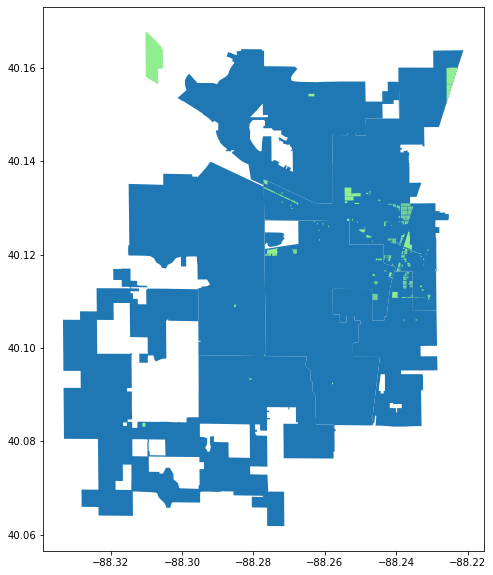

In [32]:
fig,ax = plt.subplots(figsize=(10,10))
gdf_councils.plot(ax=ax)
gdf_props.plot(ax=ax, color='lightgreen')
plt.show()

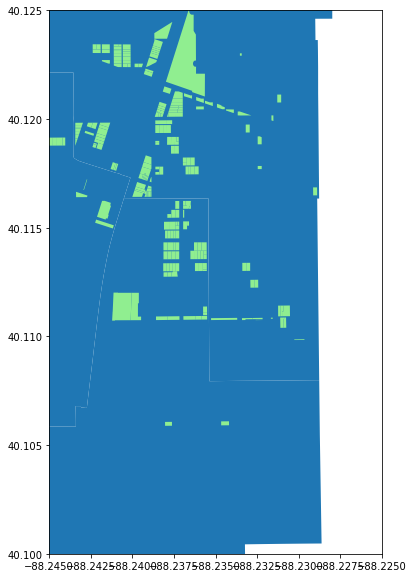

In [33]:
fig,ax = plt.subplots(figsize=(10,10))
gdf_councils.plot(ax=ax)
gdf_props.plot(ax=ax, color='lightgreen')
ax.set_xlim(-88.245,-88.225)
ax.set_ylim(40.10,40.125)
plt.show()

## Geopandas with US Census Data

In [34]:
gdf_states = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2021/STATE/tl_2021_us_state.zip')

In [35]:
gdf_states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,"POLYGON ((-80.85847 37.42831, -80.85856 37.428..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138961722096,45972570361,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778561906,6216493488,+40.1028754,-089.1526108,"POLYGON ((-89.17208 37.06831, -89.17296 37.067..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232627084,18949394733,+46.3159573,-094.1996043,"POLYGON ((-92.74568 45.29604, -92.74629 45.295..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151992308,6979074857,+38.9466584,-076.6744939,"POLYGON ((-75.76659 39.37756, -75.76630 39.373..."


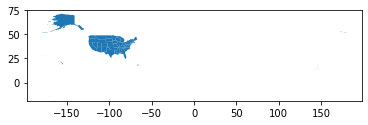

In [36]:
gdf_states.plot()

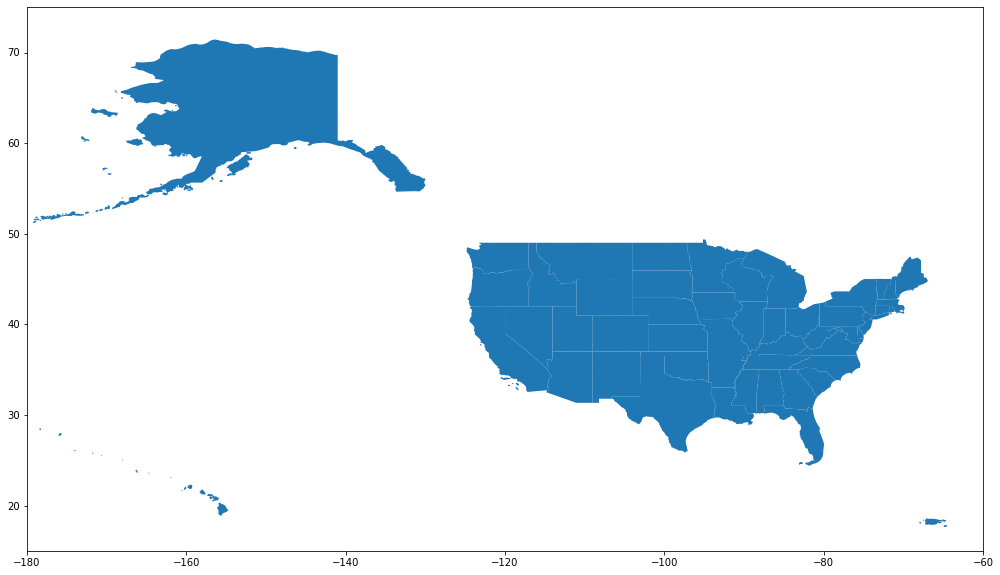

In [39]:
fig, ax = plt.subplots(figsize=(20,10))
gdf_states.plot(ax=ax)
ax.set_xlim(-180,-60)
ax.set_ylim(15,75)
plt.show()

In [40]:
gdf_na = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2021/AIANNH/tl_2021_us_aiannh.zip')
gdf_na.head()

,AIANNHCE,AIANNHNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,COMPTYP,AIANNHR,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,2320,02419022,2320R,Mohegan,Mohegan Reservation,86,D2,R,F,G2101,A,2457042,123,+41.4858024,-072.0902766,"MULTIPOLYGON (((-72.08306 41.49763, -72.08284 ..."
1,9100,01930930,9100R,Golden Hill Paugussett,Golden Hill Paugussett (state) Reservation,86,D4,R,S,G2101,A,399343,0,+41.5521875,-072.2680204,"MULTIPOLYGON (((-72.26917 41.55472, -72.26774 ..."
2,4110,02419484,4110R,Table Mountain,Table Mountain Rancheria,85,D8,R,F,G2101,A,371387,0,+36.9850490,-119.6396814,"POLYGON ((-119.64082 36.98500, -119.64058 36.9..."
3,1380,01666180,1380R,Greenville,Greenville Rancheria,85,D2,R,F,G2101,A,284692,0,+40.1487839,-120.8933989,"POLYGON ((-120.89736 40.15100, -120.89733 40.1..."
4,1110,00806894,1110R,Flathead,Flathead Reservation,86,D2,R,F,G2101,A,5013467058,316267874,+47.4967703,-114.2842791,"POLYGON ((-114.85121 47.88721, -114.81989 47.8..."


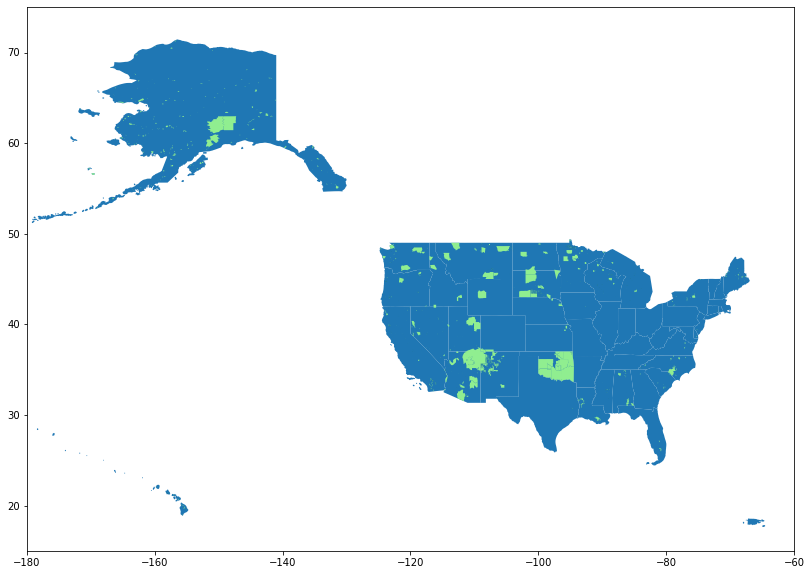

In [41]:
fig, ax = plt.subplots(figsize=(20,10))
gdf_states.plot(ax=ax)
gdf_na.plot(ax=ax, color='lightgreen')

ax.set_xlim(-180,-60)
ax.set_ylim(15,75)
plt.show()

In [42]:
gdf_na['NAMELSAD'].unique()

array(['Mohegan Reservation',
       'Golden Hill Paugussett (state) Reservation',
       'Table Mountain Rancheria', 'Greenville Rancheria',
       'Flathead Reservation', 'Bishop Reservation',
       'Fallon Paiute-Shoshone Reservation', 'Walker River Reservation',
       'Los Coyotes Reservation', 'Manzanita Reservation',
       'Mesa Grande Reservation', 'Pala Reservation',
       'Isabella Reservation', 'Mattaponi (state) Reservation',
       'Roaring Creek Rancheria', 'Pueblo of Pojoaque',
       'Rosebud Indian Reservation', 'Woodfords Community',
       'Spokane Reservation', 'Chitimacha Reservation',
       'Coos, Lower Umpqua, and Siuslaw Reservation',
       'Pascua Pueblo Yaqui Reservation', 'Berry Creek Rancheria',
       'Enterprise Rancheria', 'Shakopee Mdewakanton Sioux Community',
       'Santa Rosa Rancheria', "L'Anse Reservation",
       'Paucatuck Eastern Pequot (state) Reservation',
       'Mississippi Choctaw Reservation', 'Duck Valley Reservation',
       'Southe

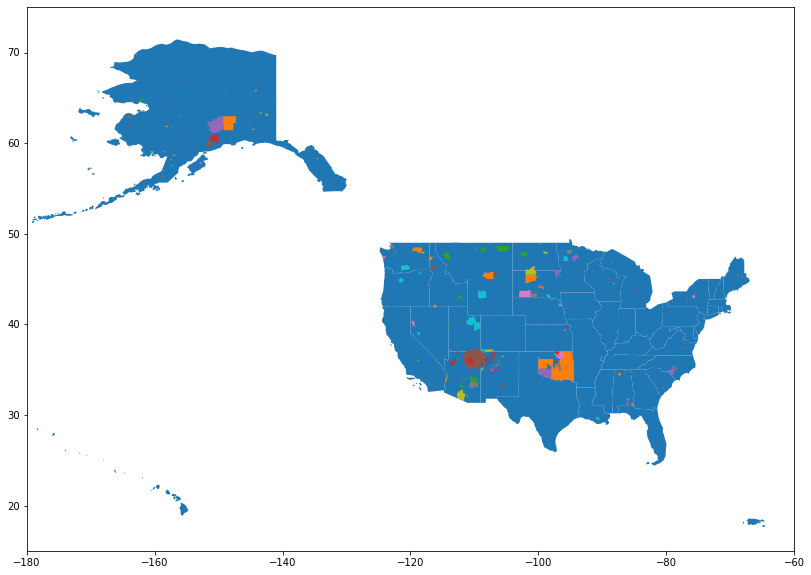

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
gdf_states.plot(ax=ax)
gdf_na.plot(column='NAMELSAD', ax=ax)

ax.set_xlim(-180,-60)
ax.set_ylim(15,75)
plt.show()

## Geopandas and Contextily

In [44]:
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


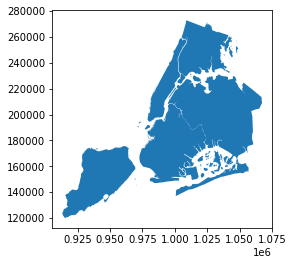

In [45]:
gdf.plot()

In [46]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

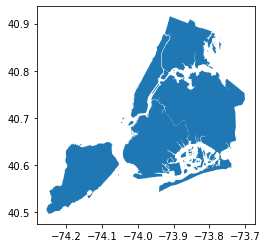

In [47]:
gdf = gdf.to_crs(epsg=4326)
gdf.plot()

In [49]:
import contextily as ctx

In [50]:
gdf = gdf.to_crs(epsg = 3857) # changing to web mercator

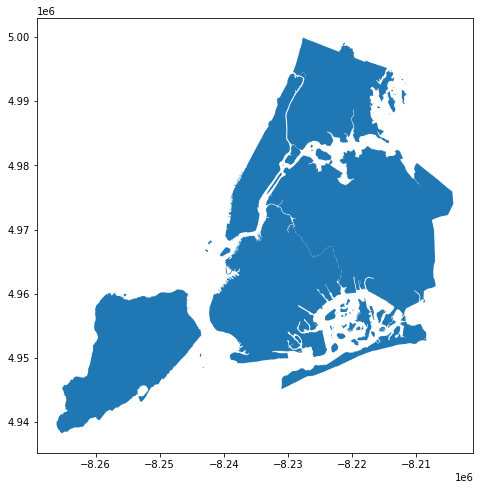

In [51]:
fig, ax = plt.subplots(figsize=(10,8))
gdf.plot(ax=ax)
plt.show()

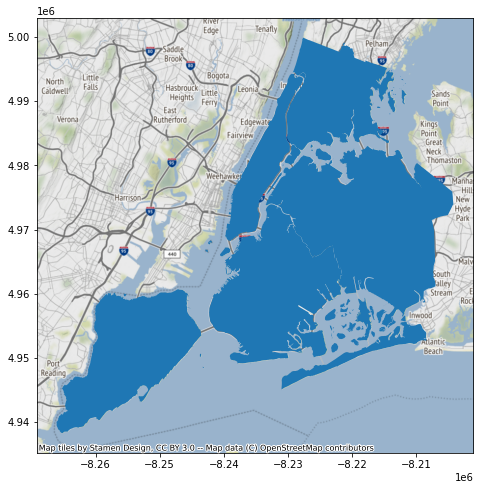

In [52]:
fig, ax = plt.subplots(figsize=(10,8))
gdf.plot(ax=ax)
ctx.add_basemap(ax=ax)
plt.show()

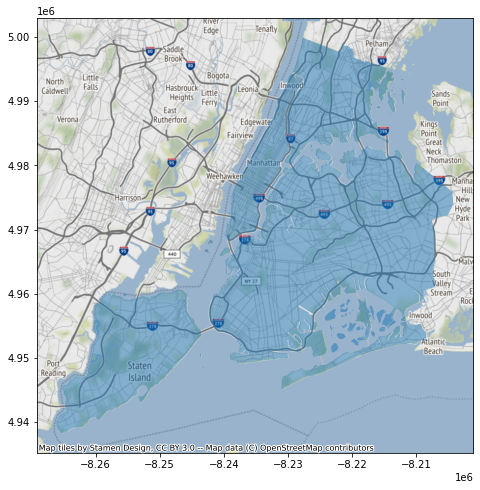

In [53]:
fig, ax = plt.subplots(figsize=(10,8))
gdf.plot(ax=ax, alpha=0.5)
ctx.add_basemap(ax=ax)
plt.show()

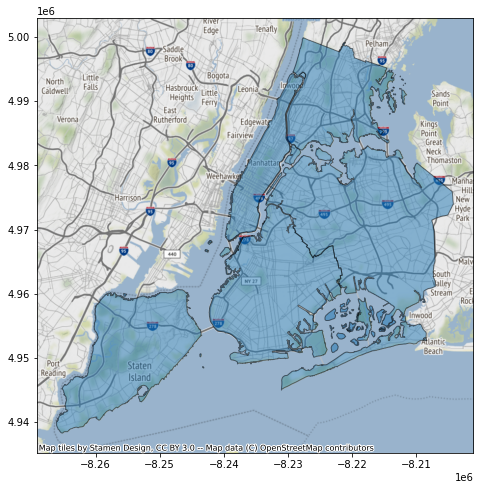

In [54]:
fig, ax = plt.subplots(figsize=(10,8))
gdf.plot(ax=ax, alpha=0.5, edgecolor='black')
ctx.add_basemap(ax=ax)
plt.show()

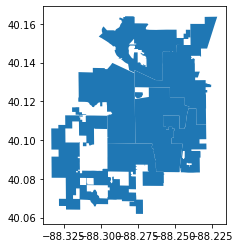

In [55]:
gdf_councils.plot()

In [56]:
gdf_councils = gdf_councils.to_crs(epsg = 3857)

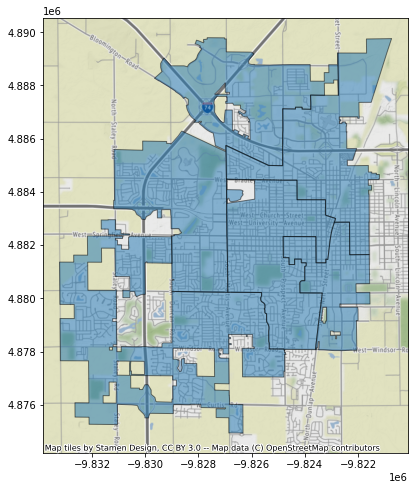

In [59]:
fig, ax = plt.subplots(figsize=(10,8))
gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='black')
ctx.add_basemap(ax=ax)
plt.show()

In [60]:
gdf_councils = gdf_councils.to_crs(epsg=4326)

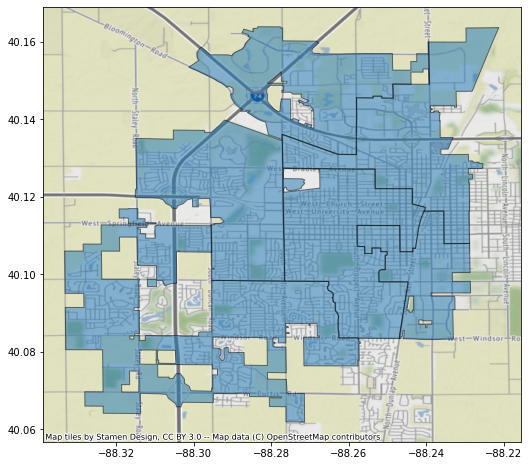

In [63]:
# plotting with 4326 crs
fig, ax = plt.subplots(figsize=(10,8))
gdf_councils.plot(ax=ax,alpha=0.5,edgecolor='black')
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)
plt.show()

In [64]:
gdf_apts = geopandas.read_file('https://opendata.arcgis.com/datasets/64154052c5a040e287bae1583d727825_8.geojson')

In [65]:
gdf_apts.head()

,OBJECTID,Address,Parcel,Units,Stories,UniqueID,Building_Name,Complex_Name,Case_Number,Building_Type,...,Comments,Safety_Comments,Fire_Alarms,Sprinkler,Managing_Company,MFRecyclingStatus,ShapeSTArea,ShapeSTLength,Shape,geometry
0,1,2009 Moreland Blvd,412001126038,36,3,0.0,2009 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19657.997437,929.167804,None,"POLYGON ((-88.25315 40.14017, -88.25315 40.140..."
1,2,2011 Moreland Blvd,412001126038,36,3,1.0,2011 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19735.512329,950.194217,None,"POLYGON ((-88.25260 40.14057, -88.25256 40.140..."
2,3,2007 Moreland Blvd,412001126038,24,3,2.0,2007 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,13970.178833,678.398035,None,"POLYGON ((-88.25274 40.14045, -88.25274 40.140..."
3,4,2003 Moreland Blvd,412001126038,36,3,3.0,2003 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19739.423340,941.358477,None,"POLYGON ((-88.25154 40.13978, -88.25156 40.139..."
4,5,2005 Moreland Blvd,412001126038,24,3,4.0,2005 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,13065.121582,636.744457,None,"POLYGON ((-88.25351 40.13934, -88.25348 40.139..."


In [66]:
gdf_apts['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', None, 'Other'],
      dtype=object)

In [67]:
gdf_apts.loc[gdf_apts['Building_Type'].isnull(), 'Building_Type'] = 'Not Specified'

In [68]:
gdf_apts['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', 'Not Specified',
       'Other'], dtype=object)

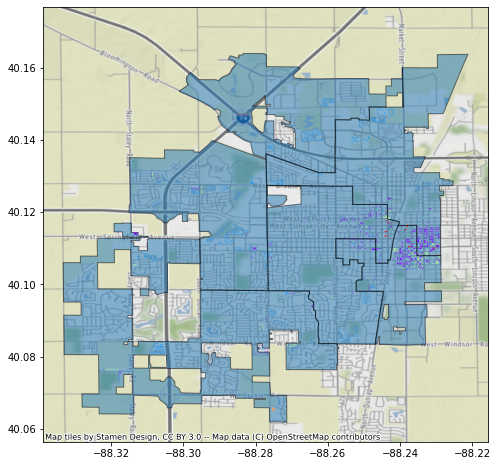

In [69]:
fig, ax = plt.subplots(figsize=(10,8))
gdf_councils.plot(ax=ax,alpha=0.5,edgecolor='black')
gdf_apts.plot(column='Building_Type', ax=ax, cmap='rainbow')
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)
plt.show()

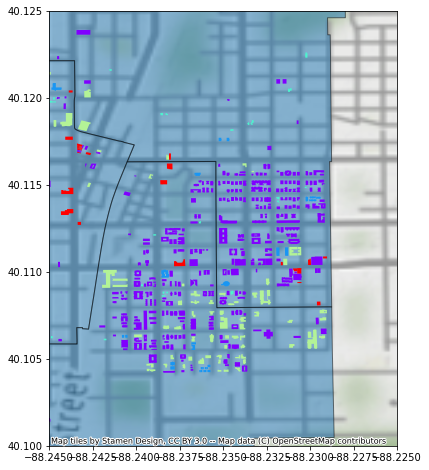

In [70]:
# zoom in on campus area
fig, ax = plt.subplots(figsize=(10,8))
gdf_councils.plot(ax=ax,alpha=0.5,edgecolor='black')
gdf_apts.plot(column='Building_Type', ax=ax, cmap='rainbow')
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)
ax.set_xlim(-88.245,-88.225)
ax.set_ylim(40.10,40.125)
plt.show()

Note that basemap is fuzzy because we zoomed after adding basemap

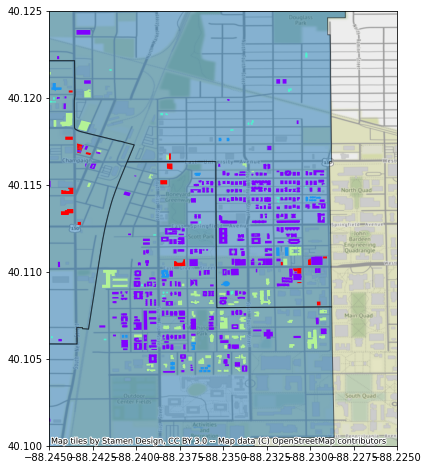

In [71]:
fig, ax = plt.subplots(figsize=(10,8))
gdf_councils.plot(ax=ax,alpha=0.5,edgecolor='black')
gdf_apts.plot(column='Building_Type', ax=ax, cmap='rainbow')
# set zoom before adding basemap
ax.set_xlim(-88.245,-88.225)
ax.set_ylim(40.10,40.125)
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)
plt.show()

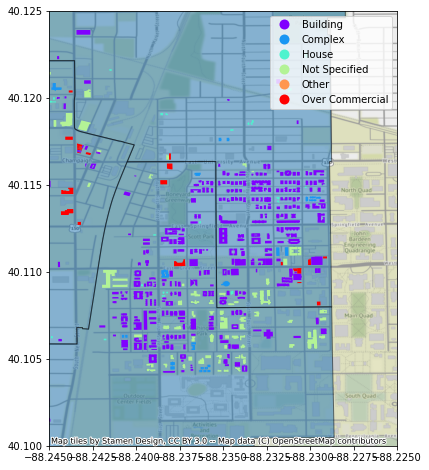

In [72]:
fig, ax = plt.subplots(figsize=(10,8))
gdf_councils.plot(ax=ax,alpha=0.5,edgecolor='black')
gdf_apts.plot(column='Building_Type', ax=ax, cmap='rainbow', categorical=True, legend=True)
# set zoom before adding basemap
ax.set_xlim(-88.245,-88.225)
ax.set_ylim(40.10,40.125)
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)
plt.show()

## Adding Interactivity to geopandas

In [73]:
import ipywidgets

In [74]:
btype = 'Building'

gdf_apts.loc[gdf_apts['Building_Type']==btype].head()

,OBJECTID,Address,Parcel,Units,Stories,UniqueID,Building_Name,Complex_Name,Case_Number,Building_Type,...,Comments,Safety_Comments,Fire_Alarms,Sprinkler,Managing_Company,MFRecyclingStatus,ShapeSTArea,ShapeSTLength,Shape,geometry
20,21,410 E Green St,462118129026 & 462118129027,64,5,20.0,410 E Green St,,None,Building,...,None,None,None,None,None,Yes,15958.883057,507.147218,None,"POLYGON ((-88.23259 40.11039, -88.23218 40.110..."
21,22,408 E Green St,462118129017,28,3,21.0,408 E Green St,,AI08-0013,Building,...,,,None,None,None,Yes,8914.532959,539.800411,None,"POLYGON ((-88.23259 40.11039, -88.23260 40.110..."
22,23,406 E Green St,462118129017,9,2,22.0,406 E Green St,,AI08-0013,Building,...,,,None,None,None,Yes,2434.252197,215.323497,None,"POLYGON ((-88.23284 40.11054, -88.23297 40.110..."
96,97,1114 Broadmoor Dr,452023257004,4,1,112.0,1114 Broadmoor Dr,,AI09-0018,Building,...,,,None,None,None,None,2008.372314,187.683177,None,"POLYGON ((-88.26361 40.09367, -88.26373 40.093..."
97,98,1201 Broadmoor Dr,452023256021,2,1,113.0,1201 Broadmoor Dr,Broadmoor Drive Apartments,None,Building,...,None,None,None,None,None,None,3677.721069,413.708046,None,"POLYGON ((-88.26447 40.09370, -88.26447 40.093..."


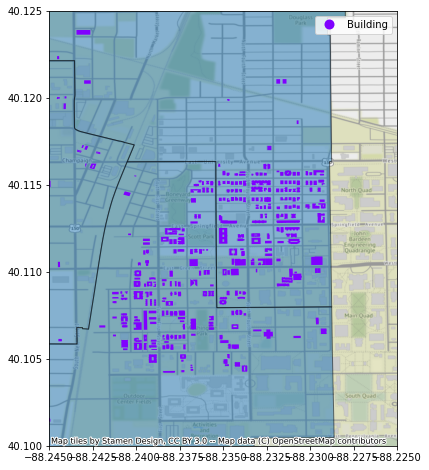

In [77]:
# step 1: hard code parameter
btype = 'Building'

gdf_apt_subset = gdf_apts.loc[gdf_apts['Building_Type']==btype]

fg,ax=plt.subplots(figsize=(10,8))
gdf_councils.plot(ax=ax,alpha=0.5,edgecolor='black')
gdf_apt_subset.plot(column='Building_Type', ax=ax, cmap='rainbow', categorical=True, legend=True)
ax.set_xlim(-88.245,-88.225)
ax.set_ylim(40.10,40.125)
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)

In [78]:
# step 2: make function

def my_geopandas_plot(btype):
    gdf_apt_subset = gdf_apts.loc[gdf_apts['Building_Type']==btype]
    fg,ax=plt.subplots(figsize=(10,8))
    gdf_councils.plot(ax=ax,alpha=0.5,edgecolor='black')
    gdf_apt_subset.plot(column='Building_Type', ax=ax, cmap='rainbow', categorical=True, legend=True)
    ax.set_xlim(-88.245,-88.225)
    ax.set_ylim(40.10,40.125)
    ctx.add_basemap(ax=ax, crs=gdf_councils.crs)

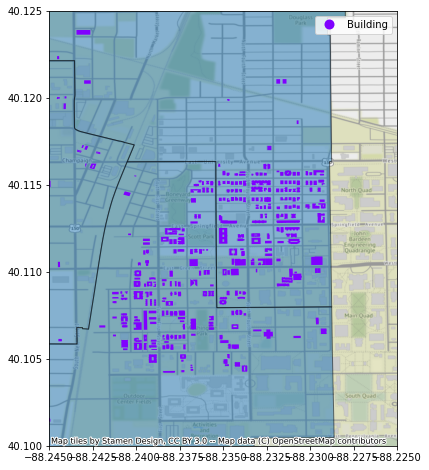

In [79]:
my_geopandas_plot('Building')

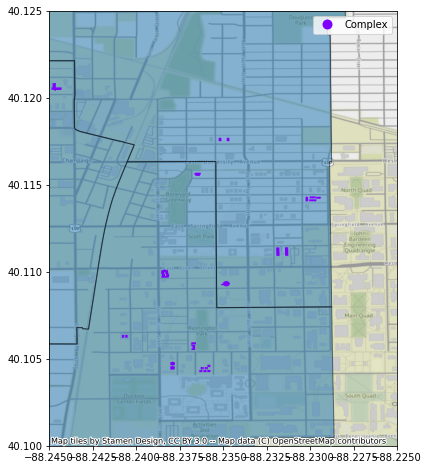

In [80]:
my_geopandas_plot('Complex')

In [82]:
# step 3: interaction
@ipywidgets.interact(btype=gdf_apts['Building_Type'].unique())

def my_geopandas_plot(btype):
    gdf_apt_subset = gdf_apts.loc[gdf_apts['Building_Type']==btype]
    fg,ax=plt.subplots(figsize=(10,8))
    gdf_councils.plot(ax=ax,alpha=0.5,edgecolor='black')
    gdf_apt_subset.plot(column='Building_Type', ax=ax, cmap='rainbow', categorical=True, legend=True)
    ax.set_xlim(-88.245,-88.225)
    ax.set_ylim(40.10,40.125)
    ctx.add_basemap(ax=ax, crs=gdf_councils.crs)

interactive(children=(Dropdown(description='btype', options=('Complex', 'Building', 'House', 'Over Commercial'…